In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# import missingno as msno
import seaborn as sns

from src import config

In [3]:
product_details = pd.read_csv(config.RAW_FILE_PATH / 'olist_products_dataset.csv')
product_category = pd.read_csv(config.RAW_FILE_PATH / 'product_category_name_translation.csv')
order_items = pd.read_csv(config.RAW_FILE_PATH / 'olist_order_items_dataset.csv')

In [4]:
product_details.info()
print(product_details.isna().sum())
product_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
product_category.info()

print(product_category.isna().sum())

product_category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
product_category_name            0
product_category_name_english    0
dtype: int64


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
product_dict = product_category.set_index("product_category_name").T.to_dict('records')
product_dict = product_dict[0]

In [117]:
product_details = product_details.replace({"product_category_name":product_dict})
product_details = product_details[['product_id','product_category_name']]
product_details

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


<b>Top 10 Product Listings</b>

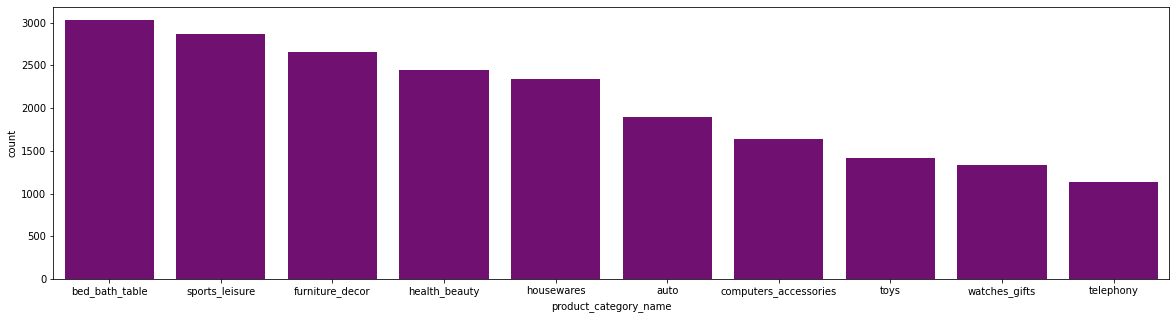

In [113]:
#Top 10 product listings' categories 

listings_top10 = product_details.groupby("product_category_name").count().sort_values(by='product_id', ascending = False)
listings_top10 = listings_top10.iloc[:10,:].reset_index()
listings_top10.rename(columns={"product_id":"count"},inplace = True)

plt.subplots(figsize=(20, 5))
listing = sns.barplot(x='product_category_name',y='count',data= listings_top10,color='purple')
plt.show()

In [9]:
#Top 10 products sold categories 

In [10]:
orders_product_category = pd.merge(order_items,product_details,on='product_id',how = 'inner')
orders_product_category = orders_product_category[['order_id','product_id','price','freight_value','product_category_name']]
orders_product_category.head()

,order_id,product_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


<b>Top 10 product sold by categories by total value </b> (not filtered by minimum count)

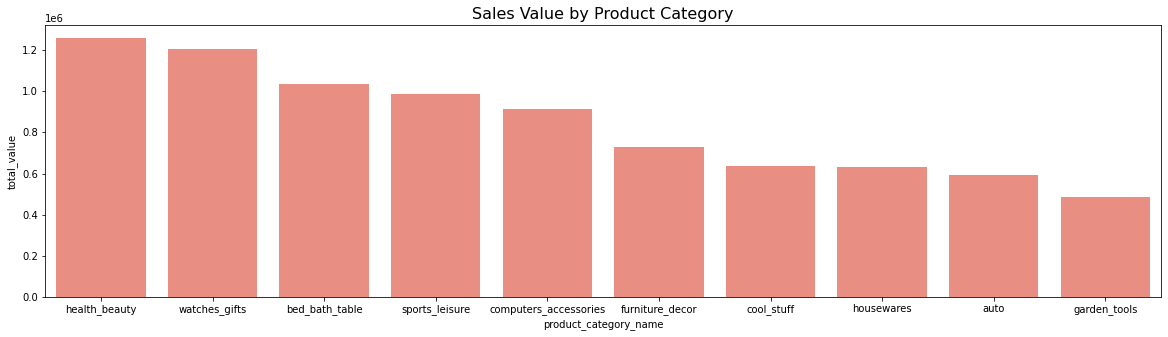

In [78]:
orderedvalue_top10 = orders_product_category[['product_category_name','product_id','price']].groupby("product_category_name").sum().sort_values(by='price',ascending = False)
orderedvalue_top10 = orderedvalue_top10.iloc[:10,:].reset_index()
orderedvalue_top10.rename(columns={"price":"total_value"},inplace = True)
orderedvalue_top10

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title("Sales Value by Product Category", fontsize=16)
ax = sns.barplot(x='product_category_name',y='total_value',data= orderedvalue_top10,color='salmon')
plt.show()

Health & Beauty, Watches & Gifts, Bed Bath & Table, Sports & Leisure and Computer Accessories generated the most sales over the past 2 years. 

<b>Top 10 product sold by categories by quantity </b> (not filtered by minimum count)

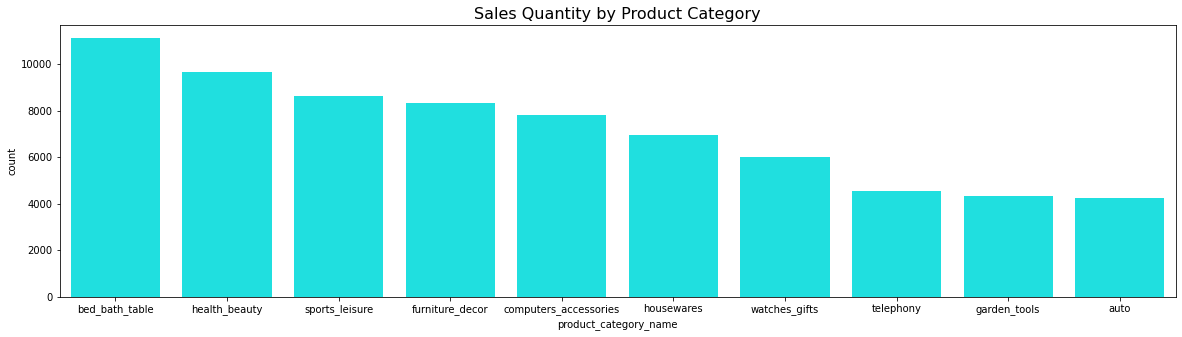

In [79]:
ordered_top10 = orders_product_category[['product_category_name','product_id','price']].groupby("product_category_name").count().sort_values(by='product_id',ascending = False)
ordered_top10 = ordered_top10.iloc[:10,:].reset_index()
ordered_top10.rename(columns={"product_id":"count"},inplace = True)

fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title("Sales Quantity by Product Category", fontsize=16)
ax = sns.barplot(x='product_category_name',y='count',data= ordered_top10,color='cyan')
plt.show()

Bed Bath & Table, Health & Beauty, Sports & Leisure, Furniture & Decor, Computer Accessories are top selling items in terms of quantity sold over the past 2 years. We observe that 4 of the Top 5 were also in the Top 5 product categories by sales. 

Watch & Gifts that ranked 2nd in terms of sales value is ranked 7th by sales quantity. We may infer that the average value of Watches & Gifts may be more expensive. This is the opposite for Furniture & Decor which is ranked 4th most sold but 6th in total sales value. 

What we have observed is also that the top categories are also the ones that are listed the most on Olist.

<b>Average Cost by categories </b> (not filtered by minimum count)

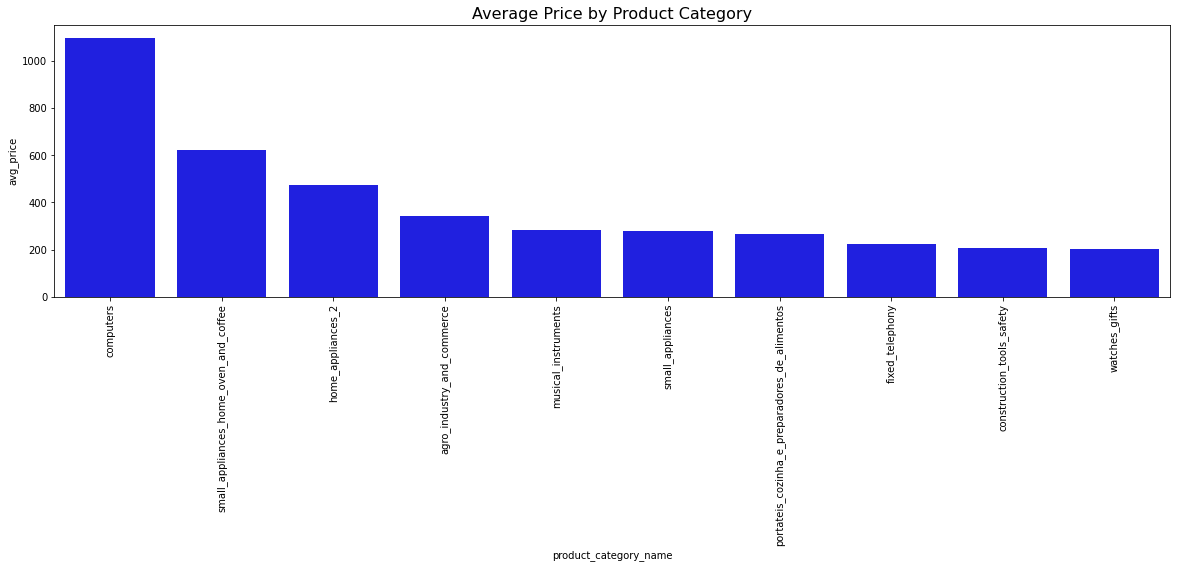

In [106]:
orderedvalue = orders_product_category[['product_category_name','product_id','price']].groupby("product_category_name").sum().sort_values(by='price',ascending = False)
orderedqty = orders_product_category[['product_category_name','product_id']].groupby("product_category_name").count().sort_values(by='product_id',ascending = False)
orderedqty.rename(columns={"product_id":"count"},inplace = True)

orderedvalqty = pd.merge(orderedvalue,orderedqty,on='product_category_name',how = 'inner')
orderedvalqty['avg_price'] =orderedvalqty['price']/orderedvalqty['count']
orderedvalqty['total_sales'] = orderedvalqty['price']*orderedvalqty['count']
orderedvalqty = orderedvalqty.sort_values(by='avg_price', ascending = False).reset_index()


fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title("Average Price by Product Category", fontsize=16)
ax.tick_params(axis='x', rotation=90)
ax = sns.barplot(x='product_category_name',y='avg_price',data=orderedvalqty.iloc[:10,:],color='blue')
plt.show()

Computers, Small Appliances, Home Appliances are the top three with higher average cost. The product quantities sold may be relatively lesser than the health & beauty and other categories mentioned above. In the next segment, we will redo the analysis, but now, setting a minimum sales quantity of 500 to minimise any biasness.

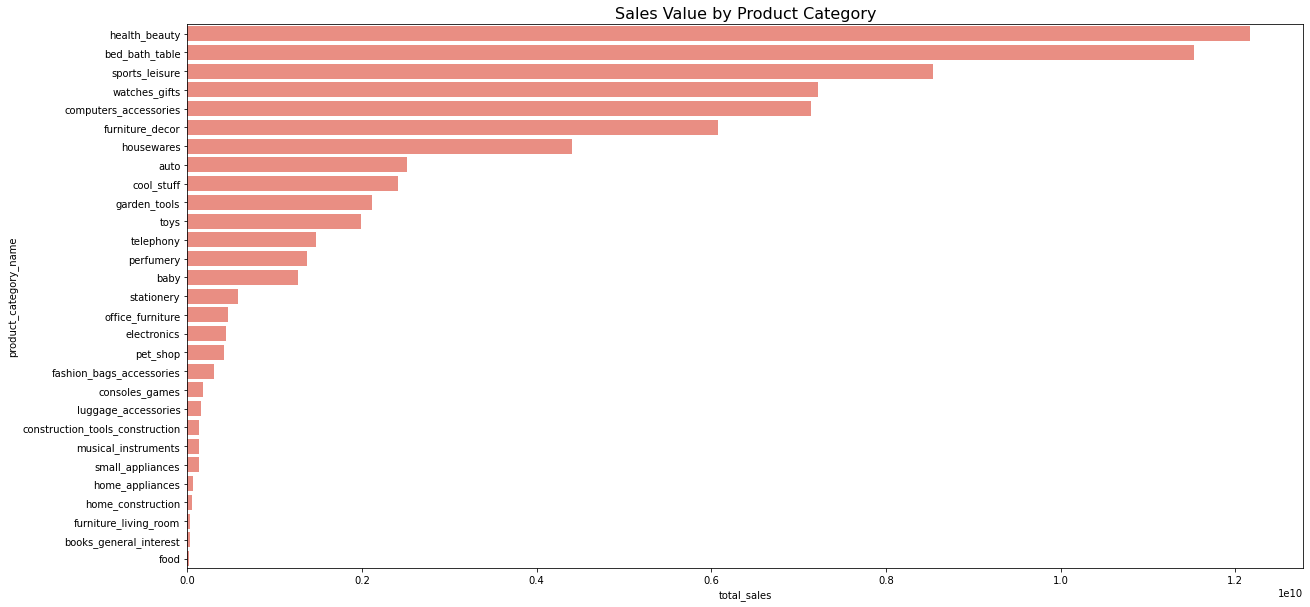

In [108]:
orderedvalqty_500 = orderedvalqty[orderedvalqty['count']>500] 
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Sales Value by Product Category", fontsize=16)
ax = sns.barplot(x='total_sales',y='product_category_name',data=orderedvalqty_500.sort_values(by='total_sales', ascending = False),color='salmon')
plt.show()

Health & Beauty, Watches & Gifts, Bed Bath & Table, Sports & Leisure and Computer Accessories remained at the Top 5.

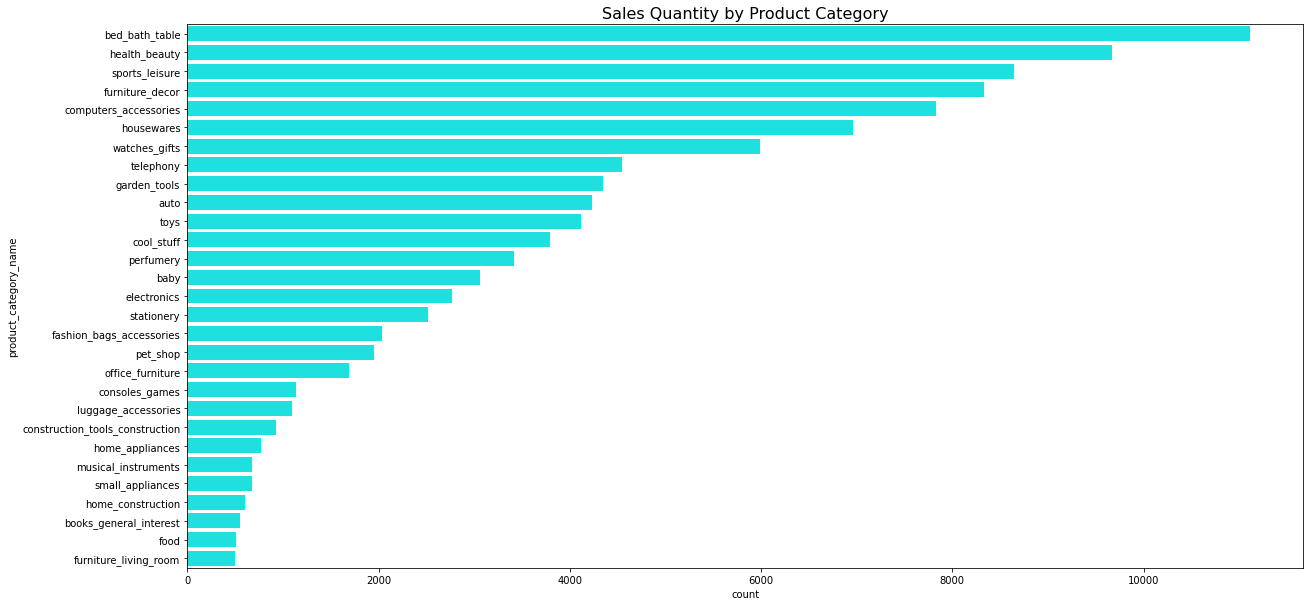

In [111]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Sales Quantity by Product Category", fontsize=16)
ax = sns.barplot(x='count',y='product_category_name',data=orderedvalqty_500.sort_values(by='count', ascending = False),color='cyan')
plt.show()

No change as well.

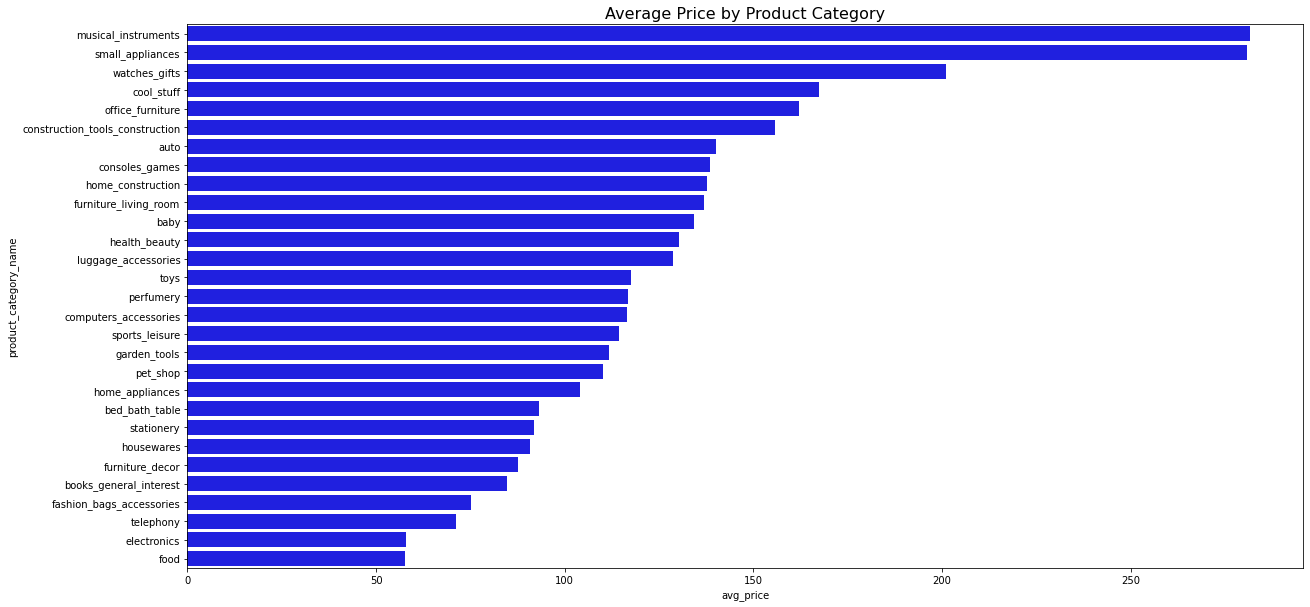

In [110]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Average Price by Product Category", fontsize=16)
ax = sns.barplot(x='avg_price',y='product_category_name',data=orderedvalqty.sort_values(by='avg_price', ascending = False),color='blue')
plt.show()

Musical instruments, small appliances and Watches & Gifts are amongst the top 3 more pricey items. 
We can also observe the Health & Beauty that brings in the most sale is ranked 12th in this category. 

We make an interesting obseration that Watch & Gifts and Auto are the only two categories that are in the Top 10 in terms of total sales, total quantity purchased and average price. 

In [151]:
reviews = pd.read_csv(config.RAW_FILE_PATH / 'olist_order_reviews_dataset.csv')
reviews_category = pd.merge(reviews,orders_product_category,on='order_id',how = 'inner')

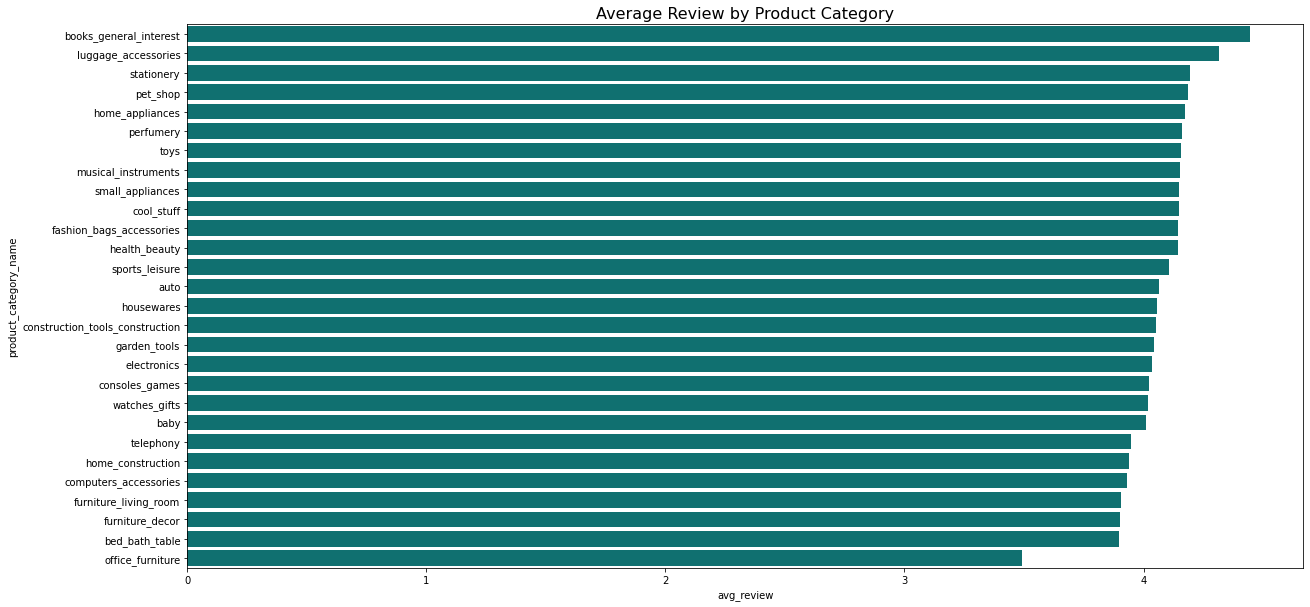

In [178]:
reviews_score = reviews_category[['product_category_name','order_id']].groupby("product_category_name").count()
reviews_score.rename(columns = {'order_id':'count'},inplace = True)
reviews_score['avg_review'] = reviews_category[["product_category_name",'review_score']].groupby("product_category_name").mean()

reviews_score_500 = reviews_score[reviews_score['count']>500].sort_values(by='avg_review',ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Average Review by Product Category", fontsize=16)
ax = sns.barplot(x='avg_review',y='product_category_name',data=reviews_score_500,color='teal')
plt.show()

In particular, Books & General Interest ranked the highest. Most products were rated with a score of 4 and above. 